<h1><center>PI #1 MLOPS - EDA</center></h1>

### Importando librerias

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [23]:
df = pd.read_csv("Dataset_generados/movies_dataset_transformado.csv")
df.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,cast,crew
0,Toy Story Collection,30000000.0,"Animation, Comedy, Family",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,...,English,Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,NaN,65000000.0,"Adventure, Fantasy, Family",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995-12-15,...,"English, Français",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,Grumpy Old Men Collection,NaN,"Romance, Comedy",15602,en,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros., Lancaster Gate",United States of America,1995-12-22,...,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,NaN,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45452 entries, 0 to 45451
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4497 non-null   object 
 1   budget                 8908 non-null   float64
 2   genres                 43067 non-null  object 
 3   id                     45452 non-null  int64  
 4   original_language      45441 non-null  object 
 5   overview               44511 non-null  object 
 6   popularity             45452 non-null  float64
 7   production_companies   33634 non-null  object 
 8   production_countries   39232 non-null  object 
 9   release_date           45452 non-null  object 
 10  revenue                7427 non-null   float64
 11  runtime                45206 non-null  float64
 12  spoken_languages       41554 non-null  object 
 13  status                 45372 non-null  object 
 14  tagline                20425 non-null  object 
 15  ti

### Características de los datos:	Descripción
- **belongs_to_collection:**	Un diccionario que indica a que franquicia o serie de películas pertenece la película (**categorica**)
- **budget:**	El presupuesto de la película, en dólares (**numerica**)
- **genres:**	Un diccionario que indica todos los géneros asociados a la película (**categorica**)
- **id:**	ID de la pelicula (**nominal**)
- **original_language:**	Idioma original en la que se grabo la pelicula (**categorica**)
- **overview:**	Pequeño resumen de la película (**categorica**)
- **popularity:**	Puntaje de popularidad de la película, asignado por TMDB (TheMoviesDataBase) (**numerico**)
- **production_companies:**	Lista con las compañias productoras asociadas a la película (**categorica**)
- **production_countries:**	Lista con los países donde se produjo la película (**categorica**)
- **release_date:**	Fecha de estreno de la película (**numerica**)
- **revenue:**	Recaudación de la pelicula, en dolares (**numerica**)
- **runtime:**	Duración de la película, en minutos (**numerica**)
- **spoken_languages:**	Lista con los idiomas que se hablan en la pelicula (**categorica**)
- **status:**	Estado de la pelicula actual (si fue anunciada, si ya se estreno, etc) (**categorica**)
- **tagline:**	Frase celebre asociadaa la pelicula (**categorica**)
- **title:**	Titulo de la pelicula (**categorica**)
- **vote_average:**	Puntaje promedio de reseñas de la pelicula (**numerica**)
- **vote_count:**	Numeros de votos recibidos por la pelicula, en TMDB (**numerica**)
- **release_year:** Año de lanzamiento
- **return:**   Retorno de inversion de la pelicula
- **cast:**     Actores de la pelicula
- **crew:**     Directores de la pelicula

In [25]:
df.describe().round(2)

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,8.908000e+03,45452.00,45452.00,7.427000e+03,45206.00,45452.00,45452.00,45452.00,5393.00
mean,2.158919e+07,107991.06,2.93,6.865872e+07,94.18,5.62,109.99,1991.88,5553.52
std,3.428330e+07,112118.58,6.01,1.462594e+08,38.33,1.92,491.35,24.06,216615.35
min,1.000000e+00,2.00,0.00,1.000000e+00,0.00,0.00,0.00,1874.00,0.00
25%,2.000000e+06,26367.75,0.39,2.388826e+06,85.00,5.00,3.00,1978.00,0.79
50%,8.000000e+06,59872.00,1.13,1.681038e+07,95.00,6.00,10.00,2001.00,2.06
75%,2.500000e+07,156330.50,3.69,6.714773e+07,107.00,6.80,34.00,2010.00,4.25
max,3.800000e+08,469172.00,547.49,2.787965e+09,1256.00,10.00,14075.00,2020.00,12396383.00


In [26]:
df["title"] = df["title"].astype("str")
df["overview"] = df["overview"].astype("str")

In [27]:
title_corpus = " ".join(df["title"])
overview_corpus = " ".join(df["overview"])

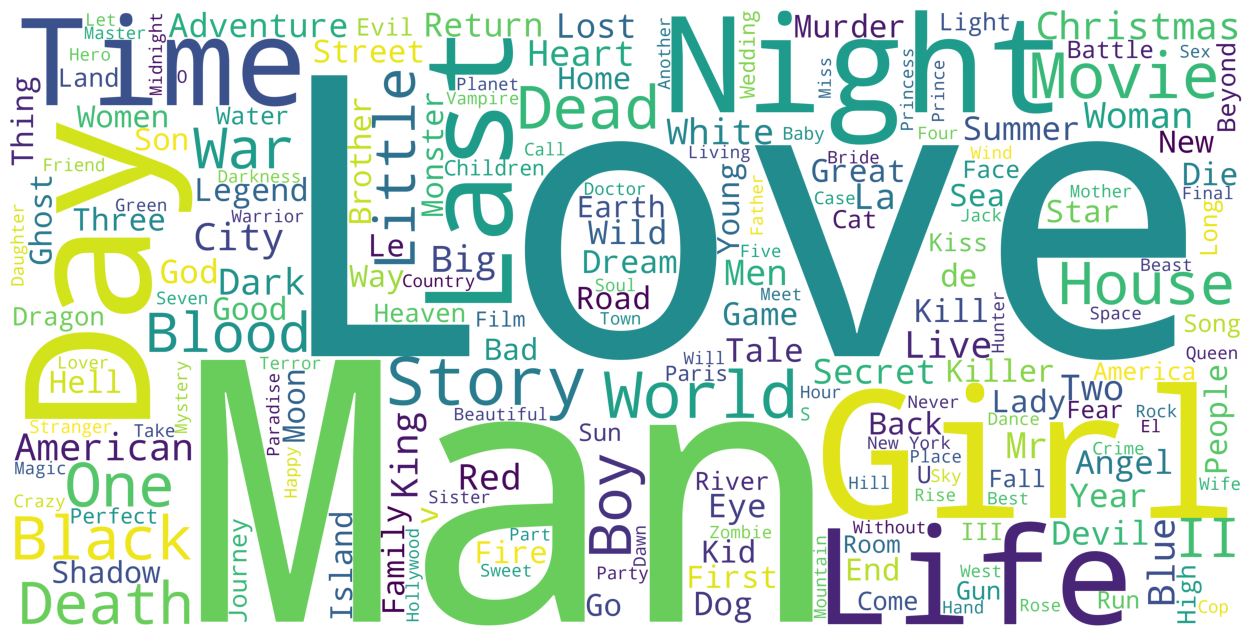

In [28]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis("off")
plt.show()

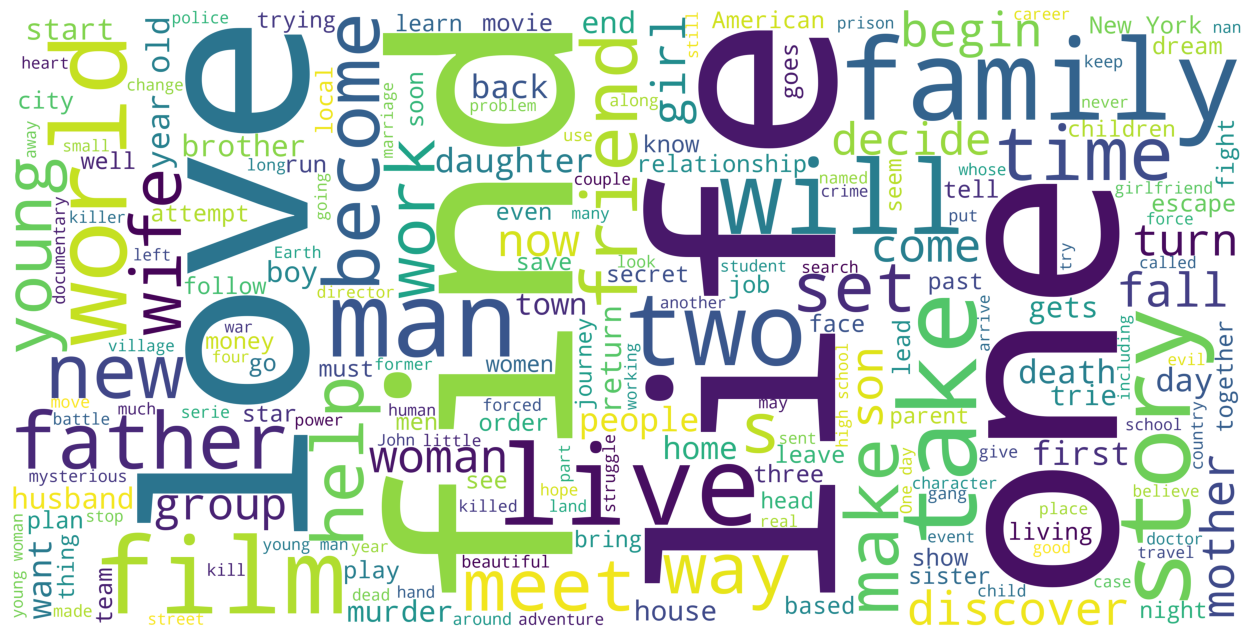

In [29]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis("off")
plt.show()

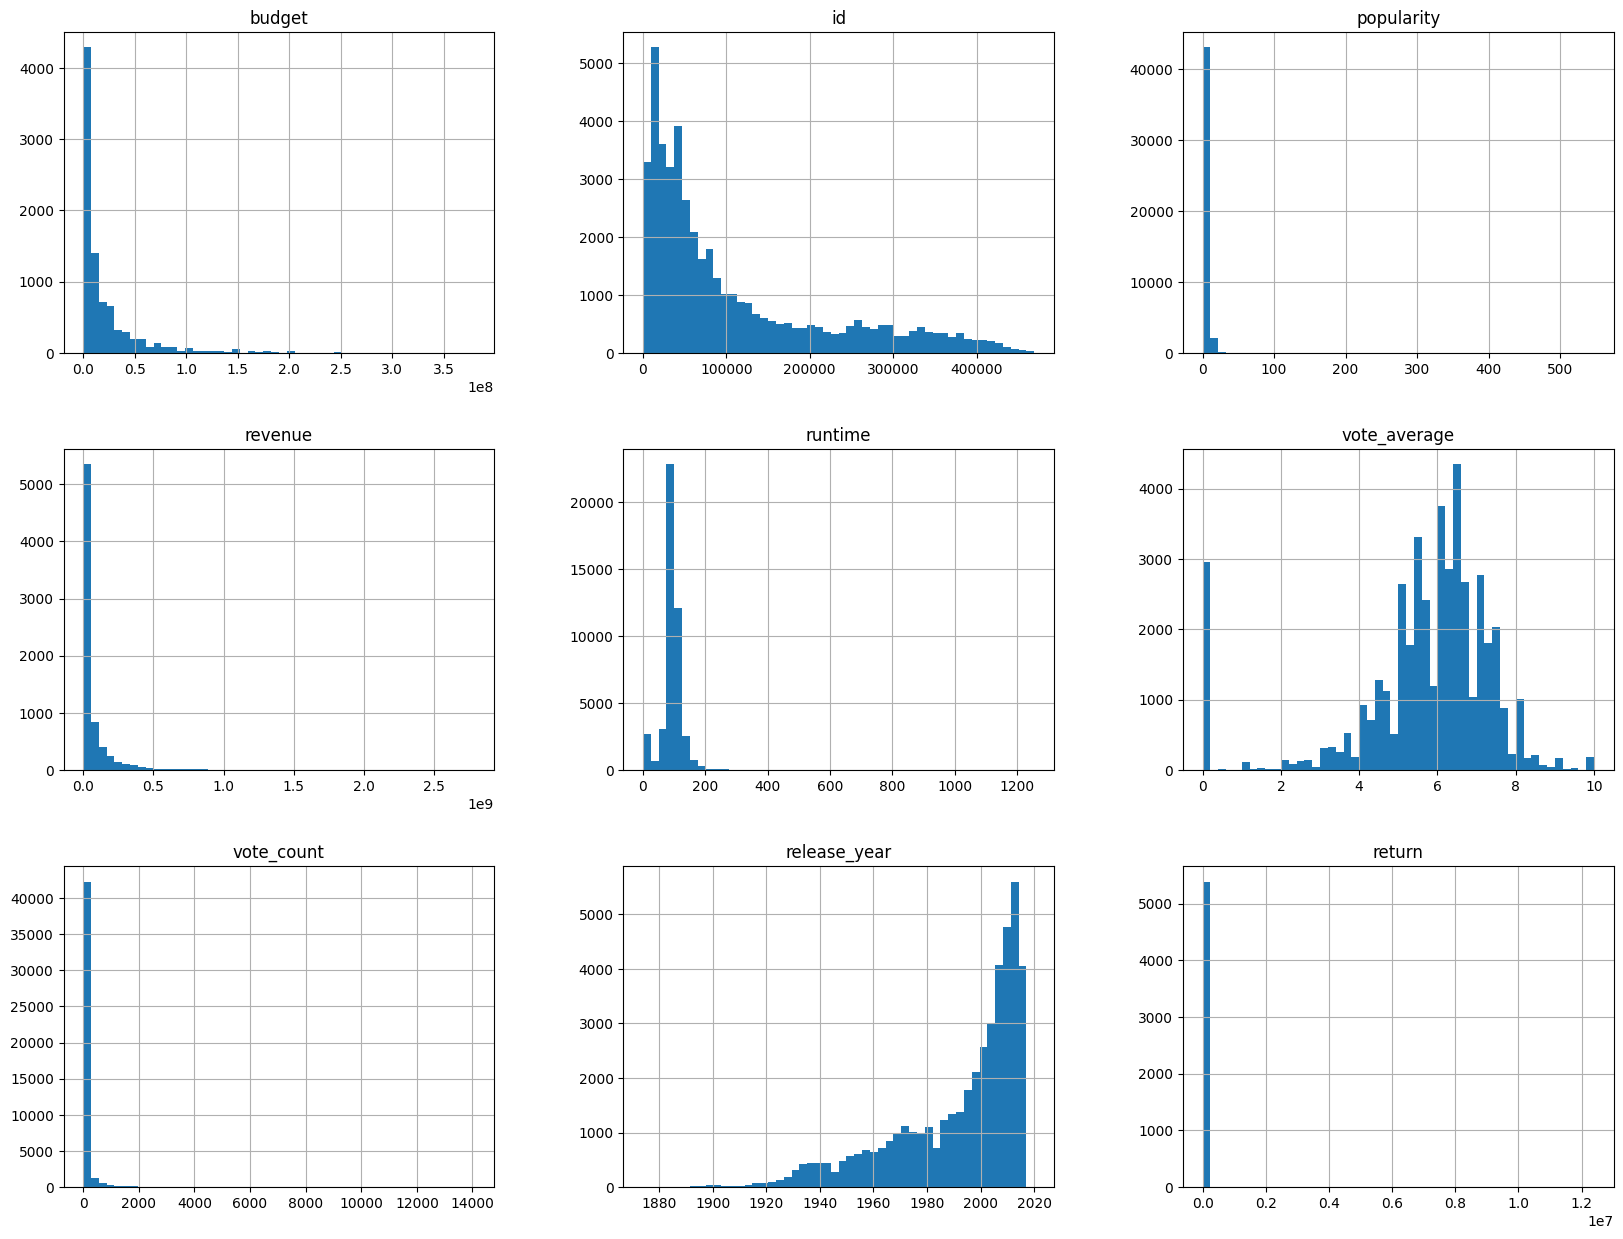

In [30]:
df.hist(bins = 50, figsize= (20,15))
plt.show()

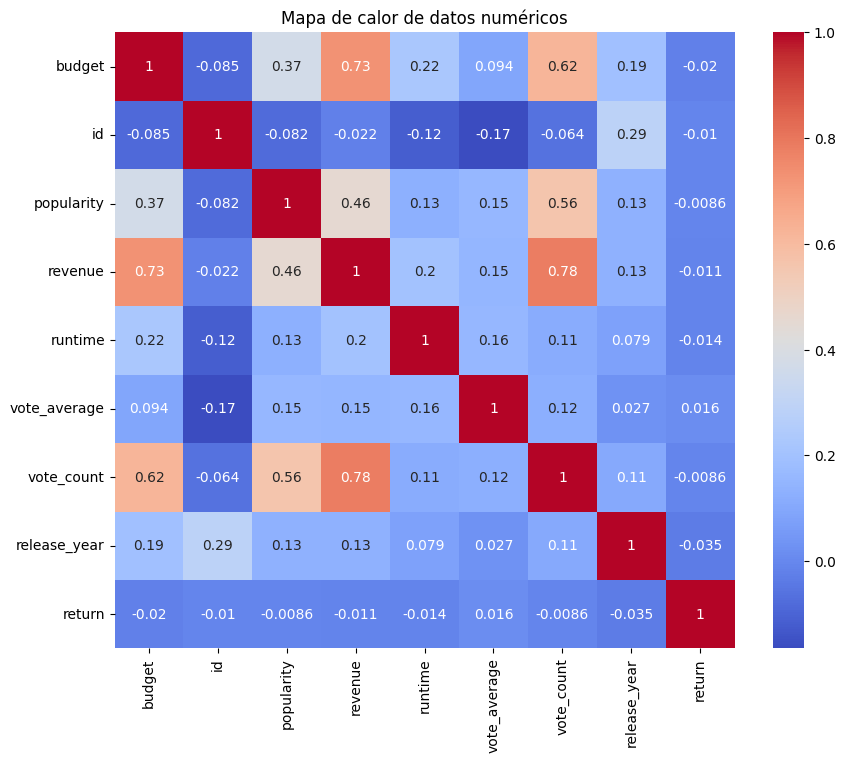

In [31]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Crear un mapa de calor para las columnas numéricas
plt.figure(figsize=(10, 8)) 
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de datos numéricos') 
plt.show()



### Conclusión: los ingresos de la pelicula estan relacionados con el presupuesto

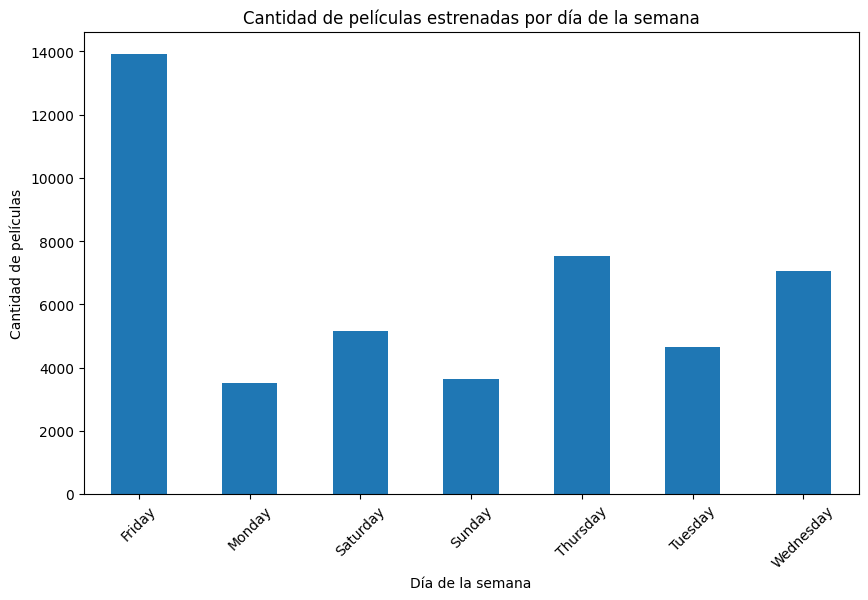

In [32]:
# Procesar la columna 'release_date' para extraer el día de la semana
df['release_date'] = pd.to_datetime(df['release_date'])
df['weekday'] = df['release_date'].dt.day_name()

# Contar las ocurrencias de cada día de la semana
weekday_counts = df['weekday'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar')
plt.title('Cantidad de películas estrenadas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=45)
plt.show()



### Conclusión: los viernes son los dias donde mas peliculas se estrenaron

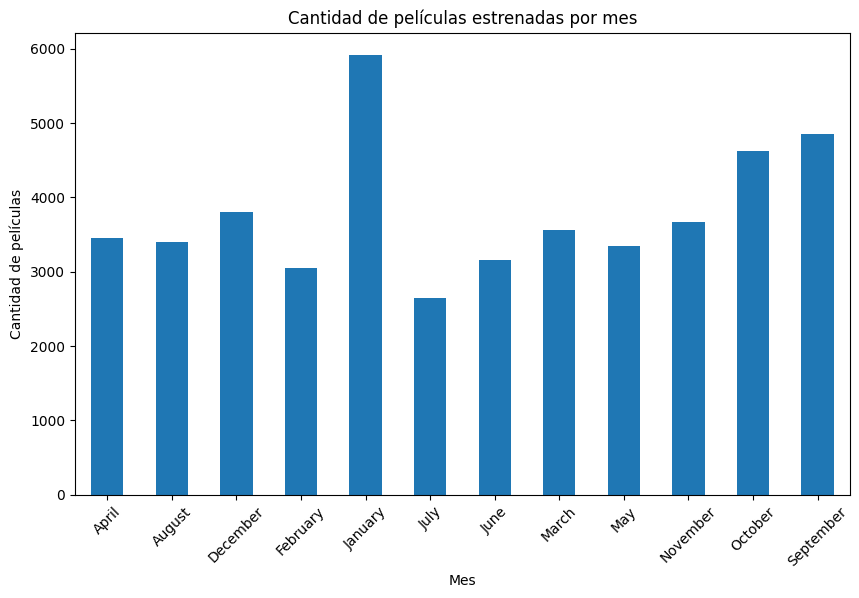

In [36]:
# Procesar la columna 'release_date' para extraer el mes
df['release_date'] = pd.to_datetime(df['release_date'])
df['month'] = df['release_date'].dt.month_name()

# Contar las ocurrencias de cada mes
weekday_counts = df['month'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6)) 
weekday_counts.plot(kind='bar')
plt.title('Cantidad de películas estrenadas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=45) 
plt.show()

### Conclusión: enero es el mes con mas peliculas estrenadas

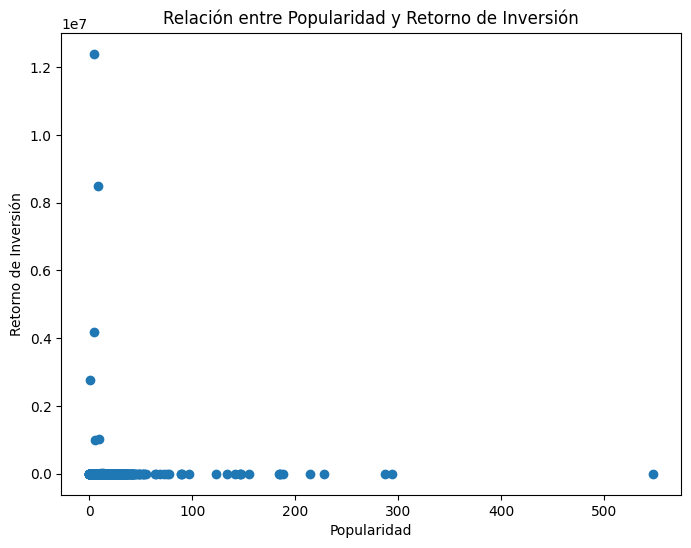

In [34]:
# Filtrar las columnas de interés
df_filtered = df[['popularity', 'return']]

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['popularity'], df_filtered['return'])
plt.title('Relación entre Popularidad y Retorno de Inversión')
plt.xlabel('Popularidad')
plt.ylabel('Retorno de Inversión')
plt.show()



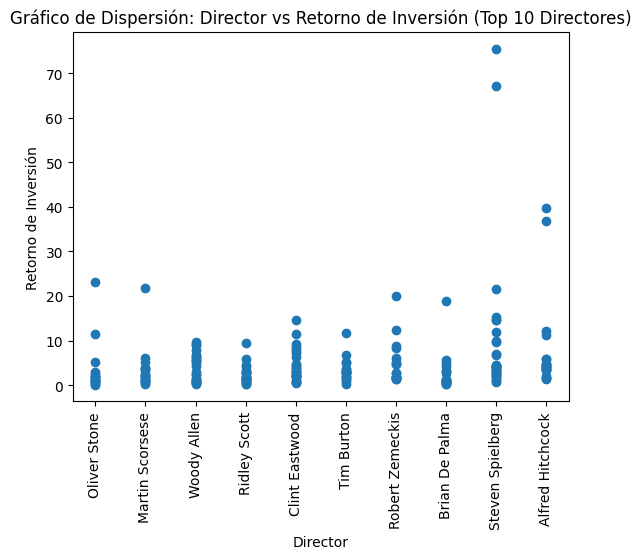

In [35]:
directores = df['crew'].str.split(', ', expand=True)
df = pd.concat([df, directores], axis=1).drop('crew', axis=1)
df_melted = pd.melt(df, id_vars=['popularity', 'return'], value_vars=[0, 1, 2], value_name='director').drop('variable', axis=1).dropna()
directores_top_10 = df_melted['director'].value_counts().head(10).index
df_filtered = df_melted[df_melted['director'].isin(directores_top_10)]
plt.scatter(df_filtered['director'], df_filtered['return'])
plt.xlabel('Director')
plt.ylabel('Retorno de Inversión')
plt.title('Gráfico de Dispersión: Director vs Retorno de Inversión (Top 10 Directores)')
plt.xticks(rotation=90)
plt.show()


### Conclusión: el director de la pelicula esta relacionado con el retorno de inversion de la pelicula, buen indicio para análisis posteriores